# Results

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clfs = ['kNN\nk=10', 'LDA', 'Linear\nSVM', 'RBF\nSVM', 'Perceptron', '1-layer\nNN', '2-layer\nNN']
val_acc = [0.722837, 0.721607, 0.853628, 0.840918, 0.739237, 0.837228, 0.834768]

df = pd.DataFrame(val_acc, index=clfs)
df

,0
kNN\nk=10,0.722837
LDA,0.721607
Linear\nSVM,0.853628
RBF\nSVM,0.840918
Perceptron,0.739237
1-layer\nNN,0.837228
2-layer\nNN,0.834768


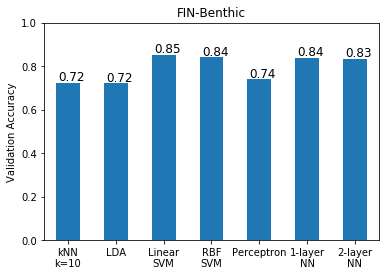

In [3]:
ax = df.plot.bar(rot=0, legend=False)
for (c, i) in enumerate(ax.patches):
    ax.text(i.get_x()+.05,i.get_height()+0.01, f"{val_acc[c]:.2f}", fontsize=12,
               color='black')
plt.title('FIN-Benthic')
plt.ylabel('Validation Accuracy')
plt.ylim((0,1))
plt.savefig('fin-benthic.png')
plt.show()

In [50]:
clfs_concat = ['kNN', 'LDA', 'Linear\nSVM', 'RBF\nSVM', 'Perceptron', '1-layer\nNN', '2-layer\nNN']
val_acc_concat = np.array([
                              [0.722837, 0.721607, 0.853628, 0.840918, 0.739237, 0.837228, 0.834768],
                              [0.814268, 0.832718, 0.917991, 0.922509, 0.716277, 0.902009, 0.909799]])

df2 = pd.DataFrame(val_acc_concat.T, index=clfs_concat)


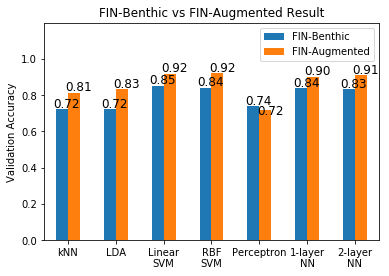

In [91]:
ax = df2.plot.bar(rot=0)
d=0
for (c, i) in enumerate(ax.patches):

    offset = 0.01
    if c%7 == 4 and d == 1:
        offset = offset * -2.5
    ax.text(i.get_x()-0.05,i.get_height()+offset, f"{val_acc_concat[d][c%7]:.2f}", fontsize=12,
              color='black')
    if c == 6:
        d = 1
plt.title('FIN-Benthic vs FIN-Augmented Result')
plt.ylabel('Validation Accuracy')
plt.legend(['FIN-Benthic', 'FIN-Augmented'])
plt.ylim((0,1.2))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('fin-benthic-same.png')
plt.show()

In [34]:
my_data = np.genfromtxt('labels.csv', delimiter=',')
np.count_nonzero(my_data==9)

5

In [35]:
len(my_data)

50

# PCA

In [83]:
pca_header = ['kNN', 'LDA']
no_pca = np.array([[0.72, 0.72],[0.77, 0.83]])

df_pca = pd.DataFrame({'Full Dimensionality': no_pca[0].T, 'PCA 1024 components': no_pca[1].T}, index=pca_header)
df_pca

,Full Dimensionality,PCA 1024 components
kNN,0.72,0.77
LDA,0.72,0.83


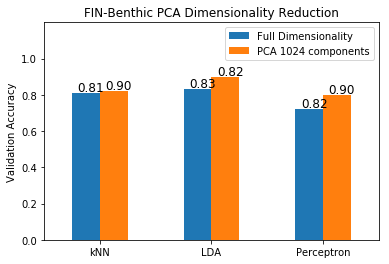

In [101]:
ax = df_pca.plot.bar(rot=0)
d = 0
for (c, i) in enumerate(ax.patches):
 
    if c == 2:
        d =1
    ax.text(i.get_x()+0.05,i.get_height()+0.01, f"{no_pca[d][c%2]:.2f}", fontsize=12,
              color='black')
plt.title('FIN-Benthic PCA Dimensionality Reduction')
plt.ylabel('Validation Accuracy')
plt.ylim((0,1.2))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('pca_improvement.png')
plt.show()

In [96]:
pca_concat_header = ['kNN', 'LDA', 'Perceptron']
no_pca = np.array([[0.81, 0.83, 0.72],[0.82, 0.90, 0.80]])

df_pca = pd.DataFrame({'Full Dimensionality': no_pca[0].T, 'PCA 1024 components': no_pca[1].T}, index=pca_header)
df_pca

,Full Dimensionality,PCA 1024 components
kNN,0.81,0.82
LDA,0.83,0.90
Perceptron,0.72,0.80


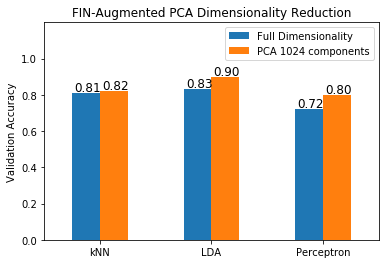

In [102]:
ax = df_pca.plot.bar(rot=0)
d = 0
for (c, i) in enumerate(ax.patches):
 
    if c == 3:
        d =1
    ax.text(i.get_x()+0.02,i.get_height()+0.01, f"{no_pca[d][c%3]:.2f}", fontsize=12,
              color='black')
plt.title('FIN-Augmented PCA Dimensionality Reduction')
plt.ylabel('Validation Accuracy')
plt.ylim((0,1.2))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('pca__concat_improvement.png')
plt.show()